In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import requests
from io import StringIO, BytesIO
from os import path

from IPython.lib.pretty import pretty, pprint

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 120)



In [2]:
def download_sheet(file_id, sheet_id):
    r = requests.get(f'https://docs.google.com/spreadsheets/d/{file_id}/export?format=csv&id={file_id}&gid={sheet_id}')
    df = pd.read_csv(BytesIO(r.content), thousands=',')
    return df
    

In [3]:
refresh_rp_file = False

rp_file_id = "1kBrPl0pdAO8gjOf_NrTgAPseFtqQA27fdfEbMBBeAhs"

sheet_ids = {
    "data_1_9":   "1682088244",
    "data_10_29": "1691041080",
}

local_files = {
    "data":       './data/rp-data.pickle',
    "natures" :   './data/natures.pickle',
    "subskills":  './data/subskills.pickle',
    "mainskills": './data/mainskills.pickle',
    "pokedex":    './data/pokedex.pickle',
}


if (refresh_rp_file):

    data_1_9 = download_sheet(rp_file_id, sheet_ids["data_1_9"])
    data_10_29 = download_sheet(rp_file_id, sheet_ids["data_10_29"])
    
    data = pd.concat([data_1_9, data_10_29], axis = 0)
    data = data.dropna(subset=["Pokemon","Level","RP","Nature","MS lvl"])
    data = data.fillna({'Amnt':0 ,'Ing2P':0, 'Help skill bonus': 1, 'RP Multiplier': 1, 'ModelRP': -1, 'Difference': -1})
    data = data.fillna({'Sub Skill 1':'','Sub Skill 2':'', 'Ingredient 2': '', 'Source':''})


    # avoid second food item
    data = data[ data["Level"] < 30 ]
    
    # avoid a bug in RP of freshly catched mon with skill up unlocked.
    data = data[ ~( (data["Sub Skill 1"] == "Skill Level Up S") & (data["MS lvl"] == 2) & (data["Level"] > 9) )]
    data = data[ ~( (data["Sub Skill 1"] == "Skill Level Up M") & (data["MS lvl"] == 3) & (data["Level"] > 9) )]
    
    data.to_pickle(local_files["data"])
    
else:
    
    data = pd.read_pickle(local_files["data"])
    
    
    
natures = pd.read_pickle(local_files["natures"])
mainskills = pd.read_pickle(local_files["mainskills"])
subskills = pd.read_pickle(local_files["subskills"])
pokedex = pd.read_pickle(local_files["pokedex"])



In [4]:
data.describe()
data.head()

# natures.head()
# mainskills.head()
# subskills.head()
# pokedex.head()

,Level,RP,MS lvl,ModelRP,Difference,Freq1,FreqL,Inv,Berry1,BerryL,Ing1P,Helps per hour,Helps Neutral,NrgMult,IngrMult,SkillMult,Ingr%,SklContr,BerryD,IngD,Dupes,Amnt,Ing2P,Help skill bonus,RP Multiplier
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.0,5172.0,5172.0,5172.000000,5172.000000
mean,9.419180,556.287510,1.397525,556.349669,0.062160,3994.586234,3860.490020,12.023589,27.988399,36.441415,108.757734,0.999068,0.989424,0.995189,1.000541,1.005994,0.206651,30.573962,52.931361,145.307425,1.0,0.0,0.0,0.989335,1.025365
std,6.230337,322.930634,0.895496,322.843211,1.233419,938.593072,999.787288,3.315695,2.617988,6.868593,15.688846,0.291100,0.059369,0.045304,0.118063,0.118338,0.043773,32.731281,25.012488,54.576571,0.0,0.0,0.0,0.035070,0.066442
min,1.000000,245.000000,1.000000,245.070000,-11.190000,2200.000000,1489.118400,7.000000,24.000000,24.000000,90.000000,0.520000,0.890000,0.920000,0.800000,0.800000,0.080000,5.990000,25.000000,90.000000,1.0,0.0,0.0,0.790000,1.000000
25%,5.000000,349.000000,1.000000,348.867500,-0.250000,3400.000000,3078.441000,10.000000,26.000000,32.000000,98.000000,0.800000,1.000000,1.000000,1.000000,1.000000,0.180000,11.990000,35.000000,101.000000,1.0,0.0,0.0,1.000000,1.000000
50%,8.000000,435.000000,1.000000,435.645000,0.010000,4000.000000,3853.200000,11.000000,28.000000,35.000000,103.000000,0.930000,1.000000,1.000000,1.000000,1.000000,0.200000,18.170000,43.000000,121.000000,1.0,0.0,0.0,1.000000,1.000000
75%,12.000000,661.000000,1.000000,660.395000,0.290000,4500.000000,4473.000000,14.000000,30.000000,40.000000,115.000000,1.162500,1.000000,1.000000,1.000000,1.000000,0.230000,43.050000,66.000000,200.000000,1.0,0.0,0.0,1.000000,1.000000
max,29.000000,3432.000000,6.000000,3429.090000,57.930000,6300.000000,6916.140000,23.000000,35.000000,67.000000,151.000000,2.410000,1.120000,1.080000,1.200000,1.200000,0.380000,421.350000,195.000000,302.000000,1.0,0.0,0.0,1.000000,1.440000


,Pokemon,Level,RP,Nature,MS lvl,Source,ModelRP,Difference,Nature2,ID,NatureP,NatureN,Freq1,FreqL,Type,Class,MSkill,Inv,Berry1,BerryL,Ing1,Ing1P,Helps per hour,Helps Neutral,NrgMult,IngrMult,SkillMult,Ingr%,SklContr,RPneutral,IDNeutral,BerryD,IngD,Dupes,DupeMatch,Sub Skill 1,Sub Skill 2,Ingredient 2,Amnt,Ing2P,Help skill bonus,RP Multiplier
0,Arbok,8.0,531.0,Hardy,1,Questions help guides,530.76,-0.24,Neutral,ArbokNeutral81,-,-,3700.0,3648.20,Poison,Berries,Charge Energy S,14.0,32.0,39,Bean Sausage,103.0,0.98,1.00,1.00,1.0,1.0,0.26,22.79,531.00,ArbokNeutral81,78.0,103,1,True,,,,0.0,0.0,1.0,1.0
1,Arbok,9.0,574.0,Naughty,1,Rate My Mon,574.45,0.45,Naughty,ArbokNaughty91,Speed of Help,Main Skill Chance,3700.0,3276.72,Poison,Berries,Charge Energy S,14.0,32.0,40,Bean Sausage,103.0,1.09,0.90,1.00,1.0,0.8,0.26,22.79,538.39,ArbokNeutral91,80.0,103,1,True,,,,0.0,0.0,1.0,1.0
2,Arbok,8.0,538.0,Quiet,1,Questions help guides,538.14,0.14,Quiet,ArbokQuiet81,Ingredient Finding,Exp Gains,3700.0,3648.20,Poison,Berries,Charge Energy S,14.0,32.0,39,Bean Sausage,103.0,0.98,1.00,1.00,1.2,1.0,0.26,22.79,530.62,ArbokNeutral81,78.0,103,1,True,,,,0.0,0.0,1.0,1.0
3,Arcanine,5.0,958.0,Calm,3,,958.34,0.34,Calm,ArcanineCalm53,Main Skill Chance,Speed of Help,2500.0,2728.00,Fire,Skills,Extra Helpful S,16.0,27.0,31,Fiery Herb,130.0,1.31,1.11,1.00,1.0,1.2,0.14,84.51,937.89,ArcanineNeutral53,31.0,130,1,True,,,,0.0,0.0,1.0,1.0
4,Arcanine,3.0,715.0,Lax,2,pokemon sleep general,715.43,0.43,Lax,ArcanineLax32,Energy Recovery,Main Skill Chance,2500.0,2490.00,Fire,Skills,Extra Helpful S,16.0,27.0,29,Fiery Herb,130.0,1.44,1.00,1.08,1.0,0.8,0.14,61.24,750.16,ArcanineNeutral32,29.0,130,1,True,,,,0.0,0.0,1.0,1.0


In [5]:
# nature and subskill with known effects on production

nature_soh_effect = 0.1
subskill_help_s_effect = 0.07
subskill_help_m_effect = 0.14

subskill_ing_s_effect = 0.18
subskill_ing_m_effect = 0.36

subskill_trigger_s_effect = 0.18
subskill_trigger_m_effect = 0.36

In [6]:
# All the formula "ifs" will be implemented as one-hot vector  (0,1)

# Specialty (Class)

classes = ["Ingredients","Berries","Skills"]
data_has_class = dict( [(c, (data["Class"] == c).astype(int).to_numpy() ) for c in classes])

# Natures

traits = natures["TraitPos"].unique()

natures_with_positive_trait = dict( [( t, natures[ natures["TraitPos"] == t ]["Nature"].tolist() ) for t in traits ] )
natures_with_negative_trait = dict( [( t, natures[ natures["TraitNeg"] == t ]["Nature"].tolist() ) for t in traits ] )

data_has_positive_trait = dict( [(t, data["Nature"].isin(natures_with_positive_trait[t]).astype(int).to_numpy() ) for t in traits] )
data_has_negative_trait = dict( [(t, data["Nature"].isin(natures_with_negative_trait[t]).astype(int).to_numpy() ) for t in traits] )

# Subskills

subs = subskills["Subskill"].unique()

data_has_subskill = dict([ (s, 
                          ( ( (data["Sub Skill 1"] == s) & (data["Level"] >= 10) ) | 
                            ( (data["Sub Skill 2"] == s) & (data["Level"] >= 25) ) 
                          ).astype(int).to_numpy()
                      )
       for s in subs
     ])

In [7]:
# Here we start to organise the globals variables so writing the model get less confusing.

from types import SimpleNamespace 
computed = SimpleNamespace()

computed.has_class          = data_has_class
computed.has_positive_trait = data_has_positive_trait
computed.has_negative_trait = data_has_negative_trait
computed.has_subskill       = data_has_subskill

# We could redo that work but it's not related to the optimisation
computed.ing1_power_base      = data["Ing1P"]
computed.berry_power_base     = data["Berry1"]
computed.berry_power_at_level = data["BerryL"]

In [8]:
# Here we will reproduce the Help/hr information as a test of using those one-hot vectors.

data_period_base  = data["Freq1"]
data_period_level = data_period_base * ((501-data["Level"])/500.0) 

nature_correction = (
    1 
    - (computed.has_positive_trait["Speed of Help"] * nature_soh_effect) # Speed is the only nature where positive is a substraction
    + (computed.has_negative_trait["Speed of Help"] * nature_soh_effect) # Because we work on time between helps.
    )

subskill_correction = (
    1 
    - (computed.has_subskill["Helping Speed S"] * subskill_help_s_effect) 
    - (computed.has_subskill["Helping Speed M"] * subskill_help_m_effect)
    )

data_period_level_nature_subskill = data_period_level * nature_correction * subskill_correction

# Are we the same up to csv precision ? Yes
#(data_period_level_nature_subskill - data["FreqL"]).describe()

# Are we exactly the same ? Yes
data_helps_per_hour = np.floor(100*3600/data_period_level_nature_subskill)/100
(data_helps_per_hour - data["Helps per hour"]).describe()

# Save to computed
computed.period_base = data_period_base
computed.period_level = data_period_level
computed.helps_per_hour = data_helps_per_hour


count    5172.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
dtype: float64

In [9]:
# Here we build the initial guess
# And package it into the 1-D array that the optimizer require.
# While doing, so we'll build a map between the model dict and the 1-D array otherwise it'll get confusing fast.

initial = {
    'Nature Ingredient Finding': 0.2, # Idea: We start at 0.25 because it's about midpoint between 0.18 and  0.36
    'Nature Main Skill Chance': 0.2,  # If it still goes to 0.2 it is what it is.
    'Nature Energy Recovery': 0.08,
}


In [10]:
# Initial guess for the ing% and skillProduct ( skill% * skillValue ) 

pokemon_to_position = {}
guess_ing_fractions = []
guess_skl_products = []

previous_ing_fractions = []
previous_skl_products = []

for record in pokedex.to_dict(orient='records') :   
    
    pokemon_to_position[record["Pokemon"]] = len(guess_ing_fractions) 
    
    # Simple linear model
    guess_ing_fractions.append( (record["Berry Power"] - 7)/record["Ing 1 Power"] )
    guess_skl_products.append( 0.5*(record["Berry Power"] - 3) * ( 3.5 if record["Class"]=="Skills" else 1.0 ) )
    
    # Last fit (reproduce result)
    previous_ing_fractions.append(record["Last fit ing"])
    previous_skl_products.append(record["Last fit skl"])
    
    
#initial["Pokemons ing fractions"] = guess_ing_fractions
#initial["Pokemons skill products"] = guess_skl_products

initial["Pokemons ing fractions"] = previous_ing_fractions
initial["Pokemons skill products"] = previous_skl_products


# In the final vector there would be offset
# But the pack/unpack idea is good enough to avoid those.
data_pokemon_positions  = np.array( list( map( lambda x: pokemon_to_position[x], data["Pokemon"]) ) ) 

computed.ing_positions = data_pokemon_positions
computed.skl_positions = data_pokemon_positions


In [11]:
# Intial guess for skill growth
# We assume that the conversion from level 1 to level L
# Has the shape a*exp(b*L). Initial guess for a,b fitted on charge strength 

for record in mainskills.to_dict(orient='records') :   
    skillname = record["Skill"]
    initial[ skillname ] = [0.7462,0.3224]


In [12]:
# Initial guess for ingredient growth.
# Comes from a previous fit
# Numpy poly convention is highest degree first

initial["Ing Growth Poly"] = [0.000224436802535453, 0.00266425197402284, 0.004768806303]

In [13]:
# Add our guess for the sub skills that multiply the whole rp
 
bonus = subskills[ subskills["RP Multiplier Guess"] >0 ]
computed.bonus_subskill_name = bonus["Subskill"].tolist()

for record in bonus.to_dict(orient='records') :
    initial[record["Subskill"]] = record["RP Multiplier Guess"]

In [14]:
# Pack the dictionary into a 1-D vector.
# Also store information on how to unpack that vector

import numbers


def pack(source):

    x =  []
    unpack_info = {}

    for k,v in source.items():
    
        start = len(x)
    
        if isinstance(v, list) and len(v) > 0:
            x.extend(v)
            unpack_info[k] = (start, len(v))
        
        elif isinstance(v, numbers.Number):
            x.append(v)
            unpack_info[k] = (start,0)
    
    return np.array(x), unpack_info


def unpack(x, unpack_info):

    unpacked = {}

    for k,v in unpack_info.items():

        start, length = v

        if(length==0):
            unpacked[k] = x[start]
        else:
            unpacked[k] = np.array(x[start:start+length])
    
    return unpacked
    
    
x0, unpack_info = pack(initial)
computed.unpack_info = unpack_info

In [15]:
# We compute our RP model here

def get_model(variables):

    model = SimpleNamespace()
    model.data = data
    model.computed = computed
    model.vars = unpack(variables, computed.unpack_info)
    return model

def ing1_value_at_level(model):
    return model.computed.ing1_power_base * ( 1.0 + np.polyval(model.vars["Ing Growth Poly"], model.data["Level"]) )

def ber_value_at_level(model):
    return model.computed.berry_power_at_level

def ing1_amount(model):
    return 1.0 + model.computed.has_class["Ingredients"]

def ber_amount(model):
    return 1.0 + model.computed.has_class["Berries"] + model.computed.has_subskill["Berry Finding S"]


def ing_fraction(model):
    
    return model.vars["Pokemons ing fractions"].take( model.computed.ing_positions )

def skl_product(model):
    
    return model.vars["Pokemons skill products"].take( model.computed.skl_positions )

def skl_growth(model):
    
    a = model.data["MSkill"].map(lambda x: model.vars[x][0])
    b = model.data["MSkill"].map(lambda x: model.vars[x][1])
 
    growth = a * np.exp( b * model.data["MS lvl"] )
    growth[ model.data["MS lvl"] == 1] = 1.0
    
    return growth


def ing_modifier(model):
    
    nature_ing_effect = model.vars["Nature Ingredient Finding"]
    
    nature_correction = (
        1.0
        + (model.computed.has_positive_trait["Ingredient Finding"] * nature_ing_effect) 
        - (model.computed.has_negative_trait["Ingredient Finding"] * nature_ing_effect)
        )

    subskill_correction = (
        1.0
        + (model.computed.has_subskill["Ingredient Finder S"] * subskill_ing_s_effect) 
        + (model.computed.has_subskill["Ingredient Finder M"] * subskill_ing_m_effect)
        )
    
    return nature_correction * subskill_correction


def skl_modifier(model):
    
    nature_msc_effect = model.vars["Nature Main Skill Chance"]
    
    nature_correction = (
        1.0
        + (model.computed.has_positive_trait["Main Skill Chance"] * nature_msc_effect) 
        - (model.computed.has_negative_trait["Main Skill Chance"] * nature_msc_effect)
        )

    subskill_correction = (
        1.0
        + (model.computed.has_subskill["Skill Trigger S"] * subskill_trigger_s_effect) 
        + (model.computed.has_subskill["Skill Trigger M"] * subskill_trigger_m_effect)
        )
    
    return nature_correction * subskill_correction

def energy_modifier(model):
    
    nature_energy_effect = model.vars["Nature Energy Recovery"]
    
    return (
        1.0
        + (model.computed.has_positive_trait["Energy Recovery"] * nature_energy_effect)
        - (model.computed.has_negative_trait["Energy Recovery"] * nature_energy_effect)
        )

def fractional_help_count(model):
     return 5.0 * model.computed.helps_per_hour

def bonus_subskill(model):
    
    bonus = 1.0
    
    for name in computed.bonus_subskill_name:
        bonus += model.computed.has_subskill[ name ] * model.vars[ name ]
    
    return bonus


def RP(variables):
    
    model = get_model(variables)
    
    ing = ing_fraction(model) * ing_modifier(model)  
    
    ingredients_value = ing * ing1_amount(model) * ing1_value_at_level(model)

    berries_value =  (1.0-ing) * ber_amount(model) * ber_value_at_level(model)
    
    mainskill_value = skl_product(model) * skl_modifier(model) * skl_growth(model)
    
    help_count = fractional_help_count(model)
    
    energy_correction = energy_modifier(model)
    
    bonus = bonus_subskill(model)
        
    rp = bonus * help_count * energy_correction * (ingredients_value + berries_value + mainskill_value)
    
    return rp


def residual(variables):
    
    return data["RP"].to_numpy() - RP(variables)



In [16]:
r = np.abs(residual(x0))
pd.Series(r).describe()

count    5172.000000
mean       13.329138
std        50.103899
min         0.000018
25%         0.175168
50%         0.364061
75%         2.027475
max      1650.264122
dtype: float64

<Axes: ylabel='Count'>

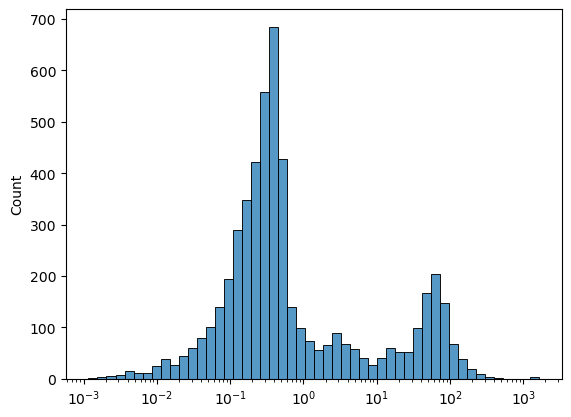

In [17]:
sns.histplot(x=r[r>1e-3], log_scale=True)

In [18]:
import scipy

opt = scipy.optimize.least_squares(residual, x0, loss="soft_l1", xtol=None ,verbose=2)  

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         6.6753e+04                                    2.36e+07    


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


       1              8         4.9890e+04      1.69e+04       7.91e-02       4.31e+07    
       2             12         4.8914e+04      9.76e+02       1.24e-03       5.99e+07    
       3             13         4.7083e+04      1.83e+03       1.24e-03       3.12e+05    
       4             14         4.6364e+04      7.20e+02       2.47e-03       1.10e+06    
       5             15         4.5273e+04      1.09e+03       4.94e-03       1.05e+05    
       6             16         4.3529e+04      1.74e+03       9.89e-03       7.43e+05    
       7             17         4.2709e+04      8.20e+02       1.98e-02       1.24e+07    
       8             18         4.1281e+04      1.43e+03       4.94e-03       1.21e+06    
       9             19         4.0897e+04      3.84e+02       9.89e-03       3.18e+06    
      10             20         3.9688e+04      1.21e+03       9.89e-03       1.31e+06    
      11             21         3.9201e+04      4.87e+02       1.98e-02       5.80e+06    

      92             116        5.6998e+03      7.92e+00       9.89e-03       8.07e+06    
      93             117        5.6954e+03      4.39e+00       9.89e-03       3.16e+06    
      94             118        5.6916e+03      3.85e+00       2.47e-03       7.29e+06    
      95             119        5.6885e+03      3.06e+00       2.47e-03       1.36e+06    
      96             120        5.6879e+03      5.98e-01       2.47e-03       6.03e+06    
      97             121        5.6855e+03      2.40e+00       2.47e-03       1.30e+06    
      98             122        5.6842e+03      1.33e+00       2.47e-03       2.92e+06    
      99             123        5.6812e+03      3.00e+00       4.94e-03       3.97e+05    
      100            124        5.6757e+03      5.49e+00       9.89e-03       3.79e+04    
      101            125        5.6649e+03      1.08e+01       1.98e-02       1.05e+04    
      102            126        5.6435e+03      2.13e+01       3.95e-02       2.95e+04    

      183            229        8.8264e+02      7.58e-01       3.95e-02       4.68e+04    
      184            230        8.8232e+02      3.28e-01       3.95e-02       5.76e+04    
      185            231        8.8170e+02      6.20e-01       9.89e-03       9.19e+03    
      186            232        8.8160e+02      9.85e-02       9.89e-03       2.71e+03    
      187            233        8.8154e+02      5.26e-02       1.98e-02       2.15e+02    
      188            234        8.8145e+02      9.51e-02       3.95e-02       3.34e+02    
      189            235        8.8126e+02      1.85e-01       7.91e-02       6.27e+02    
      190            236        8.8091e+02      3.56e-01       1.58e-01       1.59e+03    
      191            237        8.8023e+02      6.75e-01       3.16e-01       4.60e+03    
      192            238        8.7895e+02      1.28e+00       6.33e-01       1.04e+04    
      193            239        8.7647e+02      2.49e+00       1.27e+00       1.51e+04    

In [19]:
print(opt)
np.save("./results/linear-fit", opt.x)

     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 2.372e-01 -4.757e-01 ... -7.326e-01  3.304e-01]
           x: [ 2.000e-01  1.998e-01 ...  2.196e-01  2.194e-01]
        cost: 827.817999207677
         jac: [[ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
               [ 0.000e+00  1.066e+02 ...  0.000e+00  0.000e+00]
               ...
               [ 5.616e+01 -1.458e+03 ...  0.000e+00  0.000e+00]
               [ 0.000e+00 -6.914e+02 ...  0.000e+00  0.000e+00]]
        grad: [ 3.809e-02  5.495e-02 ...  1.077e-04  1.061e-04]
  optimality: 43.343821960967034
 active_mask: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
        nfev: 250
        njev: 203


count    5.172000e+03
mean     4.103272e-01
std      1.058128e+00
min      1.844001e-10
25%      1.298682e-01
50%      2.667626e-01
75%      4.159990e-01
max      5.800644e+01
dtype: float64

<Axes: ylabel='Count'>

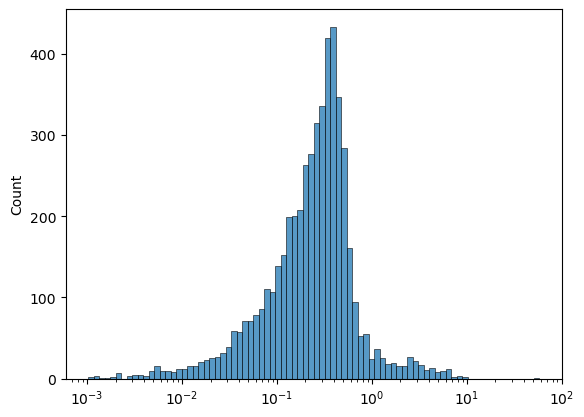

In [20]:
r_opt = np.abs(residual(opt.x))
pd.Series(r_opt).describe()
sns.histplot(x=r_opt[r_opt>1e-3], log_scale=True)

In [21]:
sol = unpack(opt.x, unpack_info)

# Print the part of solution dictionary that have small size
sol2 = sol.copy()
del sol2["Pokemons ing fractions"]
del sol2["Pokemons skill products"]

pprint(sol2)

{'Nature Ingredient Finding': 0.19998353940492822,
 'Nature Main Skill Chance': 0.19984723388971942,
 'Nature Energy Recovery': 0.08008873593298636,
 'Charge Strength S': array([0.74767768, 0.32193655]),
 'Charge Strength M': array([0.74492593, 0.32274506]),
 'Ingredient Magnet S': array([0.74549607, 0.3226823 ]),
 'Cooking Power-Up S': array([0.74533739, 0.32258488]),
 'Extra Helpful S': array([0.74523116, 0.32267266]),
 'Charge Energy S': array([0.74752443, 0.32193912]),
 'Energizing Cheer S': array([0.73273559, 0.33250876]),
 'Energy for Everyone S': array([0.74573533, 0.32266446]),
 'Dream Shard Magnet S': array([0.74673187, 0.322102  ]),
 'Metronome': array([0.74499286, 0.32307405]),
 'Ing Growth Poly': array([ 0.00018924,  0.00307164, -0.0018578 ]),
 'Dream Shard Bonus': 0.21931205595984188,
 'Energy Recovery Bonus': 0.21917603446805287,
 'Helping bonus': 0.21896633184457967,
 'Inventory Up S': 0.06918778777312137,
 'Inventory Up M': 0.13054912632892088,
 'Inventory Up L': 0.1794

In [22]:
# Format ing% and skillProduct pretty

res = pd.DataFrame({"Pokemon":pokedex["Pokemon"], "ing%": sol["Pokemons ing fractions"]*100.0, "skill% * skillValue": sol["Pokemons skill products"] })
res.set_index("Pokemon")

,ing%,skill% * skillValue
Pokemon,,
Bulbasaur,25.628604,16.740013
Ivysaur,25.464042,16.709553
Venusaur,26.596301,18.432081
Charmander,20.049454,9.681353
Charmeleon,22.674746,14.058261
Charizard,22.434519,14.005956
Squirtle,27.009191,17.631480
Wartortle,27.070847,17.580444
Blastoise,27.466215,18.442250


In [23]:
growth_display = {}
growth_display["Level"] = list(range(2,7))

for record in mainskills.to_dict(orient='records') :   
    
    skillname = record["Skill"]
    params = sol[skillname]
    values = []
    
    for level in range(2,7): 
        values.append( params[0]*np.exp(params[1]*level))
    
    growth_display[skillname] = values
    
df = pd.DataFrame(growth_display)
df.set_index("Level")


,Charge Strength S,Charge Strength M,Ingredient Magnet S,Cooking Power-Up S,Extra Helpful S,Charge Energy S,Energizing Cheer S,Energy for Everyone S,Dream Shard Magnet S,Metronome
Level,,,,,,,,,,
2,1.423459,1.420515,1.421424,1.420845,1.420892,1.423175,1.424822,1.421829,1.422129,1.421578
3,1.964085,1.961608,1.962740,1.961749,1.961986,1.963697,1.986861,1.963265,1.962574,1.963722
4,2.710039,2.708811,2.710204,2.708571,2.709136,2.709511,2.770602,2.710880,2.708402,2.712622
5,3.739304,3.740633,3.742321,3.739703,3.740811,3.738585,3.863500,3.743188,3.737664,3.747128
6,5.159481,5.165490,5.167497,5.163378,5.165362,5.158503,5.387504,5.168602,5.158072,5.176161


In [24]:
df = data[["Pokemon","ID","NatureP","NatureN","Sub Skill 1","Sub Skill 2","RP"]].copy()

df["fit"] = RP(opt.x)
df["error2"] = residual(opt.x) ** 2

df = df.sort_values("error2", ascending = False)
df.head(100)

,Pokemon,ID,NatureP,NatureN,Sub Skill 1,Sub Skill 2,RP,fit,error2
2034,Golem,GolemMild262Skill Trigger SSkill Level Up S,Ingredient Finding,Energy Recovery,Skill Trigger S,Skill Level Up S,801.0,859.006444,3364.747492
1715,Charizard,CharizardMild276Helping Speed MSkill Level Up M,Ingredient Finding,Energy Recovery,Helping Speed M,Skill Level Up M,1514.0,1504.253384,94.996517
1102,Togekiss,TogekissGentle103Skill Trigger M,Main Skill Chance,Energy Recovery,Skill Trigger M,,1282.0,1272.650845,87.406694
1551,Charizard,CharizardRash273Helping bonusHelping Speed M,Ingredient Finding,Main Skill Chance,Helping bonus,Helping Speed M,1440.0,1431.363185,74.594579
1533,Charmeleon,CharmeleonQuiet252Inventory Up MSleep EXP Bonus,Ingredient Finding,Exp Gains,Inventory Up M,Sleep EXP Bonus,1063.0,1054.464571,72.853548
993,Raticate,RaticateBrave281Inventory Up MSleep EXP Bonus,Speed of Help,EXP Gains,Inventory Up M,Sleep EXP Bonus,1097.0,1088.776615,67.624060
237,Butterfree,ButterfreeImpish265Skill Level Up MSleep EXP B...,Energy Recovery,Ingredient Finding,Skill Level Up M,Sleep EXP Bonus,1404.0,1411.262656,52.746170
2369,Sudowoodo,SudowoodoHasty162Berry Finding S,EXP Gains,Energy Recovery,Berry Finding S,,743.0,750.036778,49.516241
145,Butterfree,ButterfreeCareful103Berry Finding S,Main Skill Chance,Ingredient Finding,Berry Finding S,,910.0,903.360622,44.081342
1348,Wigglytuff,WigglytuffRelaxed153Sleep EXP Bonus,Energy Recovery,EXP Gains,Sleep EXP Bonus,,1164.0,1170.638074,44.064030
